### This will be an implementation of Simple Linear Regression using the fundamental steps. 
### We will be using a simple dataset of 7 rows, with only two columns, one as dependent variable and the other as independent variable.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance-dataset-simple-linear-regression/simplelinearregression.csv


In [2]:
insurance_data = pd.read_csv('/kaggle/input/insurance-dataset-simple-linear-regression/simplelinearregression.csv')
insurance_data.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [3]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      7 non-null      int64
 1   Premium  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [4]:
insurance_data.describe()

,Age,Premium
count,7.000000,7.000000
mean,25.857143,20214.285714
std,5.273474,6283.955382
min,18.000000,10000.000000
25%,22.500000,16500.000000
50%,26.000000,21000.000000
75%,29.500000,25250.000000
max,33.000000,27000.000000


In [5]:
X = insurance_data.Age.values
Y = insurance_data.Premium.values

In [6]:
X

array([18, 22, 23, 26, 28, 31, 33])

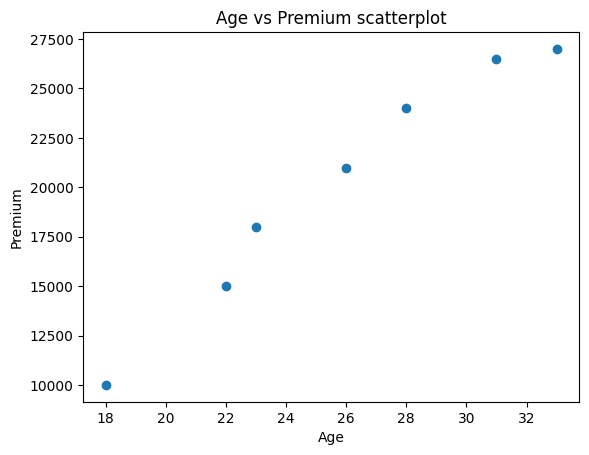

In [7]:
from matplotlib import pyplot as plt
plt.scatter(X,Y)
plt.title("Age vs Premium scatterplot")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.show()

In [8]:
print(X.shape)
print(Y.shape)

(7,)
(7,)


In [9]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [10]:
#Train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 100)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4, 1)
(3, 1)
(4, 1)
(3, 1)


In [12]:
#Train and fit the model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

insurance_lr_model = lr.fit(X_train,Y_train)

In [13]:
#Predit the model

y_pred = insurance_lr_model.predict(X_test)
y_pred

array([[15531.04925054],
       [16700.21413276],
       [26053.53319058]])

In [14]:
Y_test

array([[15000],
       [18000],
       [26500]])

In [15]:
print(lr.coef_)
print(lr.intercept_)

[[1169.16488223]]
[-10190.57815846]


### Equation of fitted regression line is Y= 1169.164 * X - 10190.57

In [16]:
#Predicting all the Insurance values in the dataset
print(lr.predict(X))

[[10854.38972163]
 [15531.04925054]
 [16700.21413276]
 [20207.70877944]
 [22546.0385439 ]
 [26053.53319058]
 [28391.86295503]]


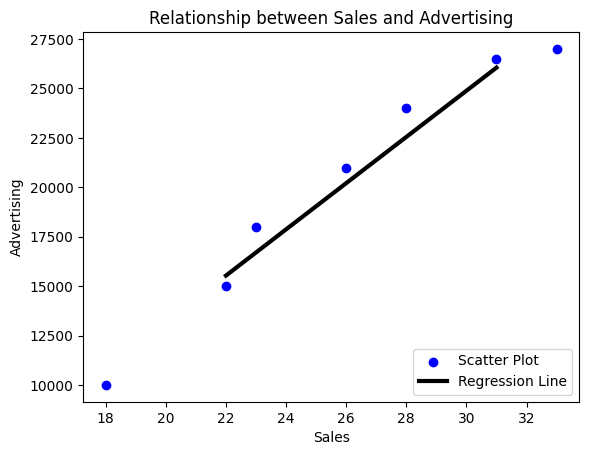

In [17]:
plt.scatter(X, Y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

In [18]:
#Calculate model performance

from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

print("R2 Score: {:.4f}".format(r2_score(Y_test, y_pred)))


RMSE value: 850.6447
R2 Score: 0.9695


### Model Interpretation

##### RMSE explains the deviation of the residuals which means the actual value of Insurance lies between + or - 850 to the predicted value. Lower this number signifies more stable the model is.

##### R2 is the coefficient of determination. Its value lies between 0 and 1. Since the value is 0.96, it signifies the model is able to predict closer to the actual values.

##### However, this is a small dataset, only for running the mechanism of Linear regression. Real world application has large amount of data unlike this example.